In [26]:
# ライブラリのインポート
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [68]:
# 販売実績データを読み込む
train = pd.read_csv('train.csv')

# 4/1以後のデータを抽出
train = train[85:]

# 確認
print(train.head())
print(train.tail()) 


    datetime    y week  soldout        name   kcal remarks event  payday  \
85  2014-4-1  125    火        1       メンチカツ  377.0     NaN   NaN     NaN   
86  2014-4-2   99    水        0        肉じゃが  380.0     NaN   NaN     NaN   
87  2014-4-3  100    木        1          酢豚  390.0     NaN   NaN     NaN   
88  2014-4-4   90    金        1  和風ソースハンバーグ  350.0     NaN   NaN     NaN   
89  2014-4-7  107    月        0     青梗菜牛肉炒め  387.0     NaN   NaN     NaN   

   weather precipitation  temperature  
85      薄曇            --         16.1  
86      薄曇            --         18.2  
87       雨             1         14.3  
88      晴れ            --         17.8  
89      快晴            --         13.8  
      datetime   y week  soldout          name   kcal          remarks  \
202  2014-9-24  59    水        1   白身魚のマスタード焼き  408.0              NaN   
203  2014-9-25  50    木        0       牛カルビ焼き肉  394.0              NaN   
204  2014-9-26  45    金        0      ランチビュッフェ    NaN  スペシャルメニュー（800円）   
205  20

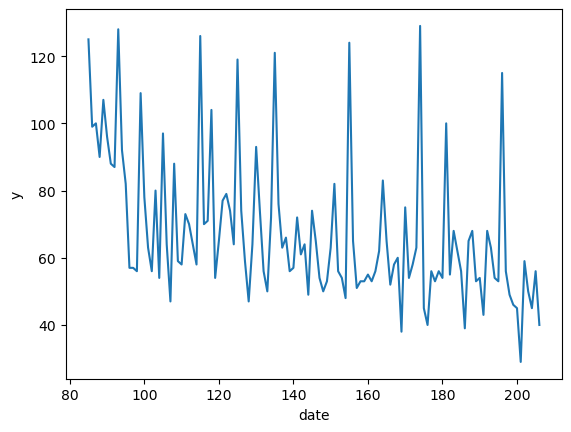

In [86]:
#販売数の折れ線グラフを作る
train['y'].plot()
plt.xlabel('date')
plt.ylabel('y')
plt.show()

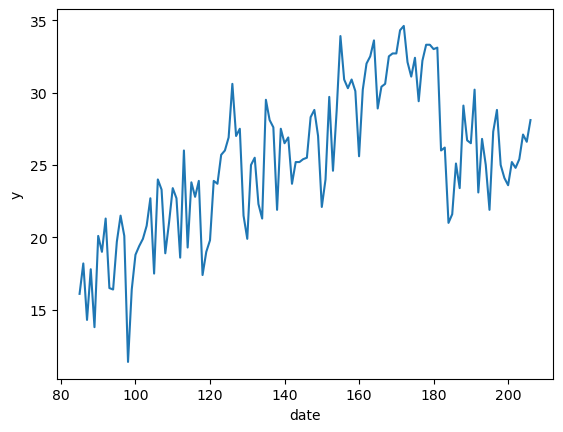

In [87]:
#気温の折れ線グラフを作る
train['temperature'].plot()
plt.xlabel('date')
plt.ylabel('y')
plt.show()

In [71]:
# データの情報を確認する
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 85 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       122 non-null    object 
 1   y              122 non-null    int64  
 2   week           122 non-null    object 
 3   soldout        122 non-null    int64  
 4   name           122 non-null    object 
 5   kcal           110 non-null    float64
 6   remarks        18 non-null     object 
 7   event          9 non-null      object 
 8   payday         6 non-null      float64
 9   weather        122 non-null    object 
 10  precipitation  122 non-null    object 
 11  temperature    122 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 11.6+ KB
None


In [73]:
# 欠損値の数を確認する
print(train.isnull().sum())


datetime           0
y                  0
week               0
soldout            0
name               0
kcal              12
remarks          104
event            113
payday           116
weather            0
precipitation      0
temperature        0
dtype: int64


In [7]:
# 欠損値のあるカラムに入っているデータを確認する
print(train['remarks'].value_counts())
print(train['name'].value_counts())
print(train['event'].value_counts())
print(train['payday'].value_counts())

お楽しみメニュー                    12
料理長のこだわりメニュー                 5
鶏のレモンペッパー焼（50食）、カレー（42食）     1
酢豚（28食）、カレー（85食）             1
手作りの味                        1
スペシャルメニュー（800円）              1
Name: remarks, dtype: int64
メンチカツ            6
タンドリーチキン         6
手作りロースカツ         5
鶏の唐揚げおろしソース      4
回鍋肉              4
                ..
白身魚唐揚げ野菜あんかけ     1
ポークハヤシ           1
酢豚orカレー          1
ハンバーグ和風きのこソース    1
鶏肉とカシューナッツ炒め     1
Name: name, Length: 156, dtype: int64
ママの会             9
キャリアアップ支援セミナー    5
Name: event, dtype: int64
1.0    10
Name: payday, dtype: int64


In [19]:
train_soldout.describe(include='O')

,datetime,week,name,remarks,event,weather,precipitation
count,93,93,93,7,6,93,93
unique,93,5,79,4,2,7,7
top,2013-11-19,水,タンドリーチキン,料理長のこだわりメニュー,ママの会,快晴,--
freq,1,24,5,3,4,23,68


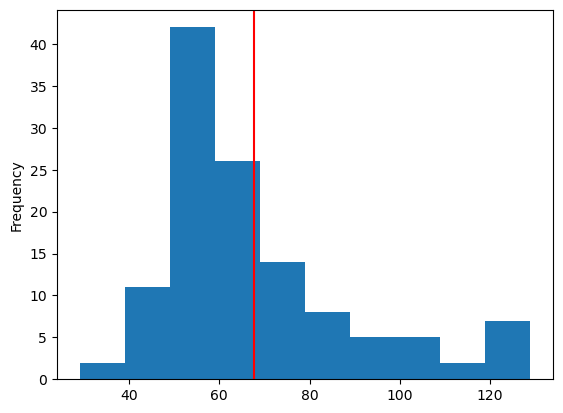

In [74]:
#ヒストグラム
train['y'].plot.hist()
plt.axvline(x=train["y"].mean(), color="red")
plt.show()

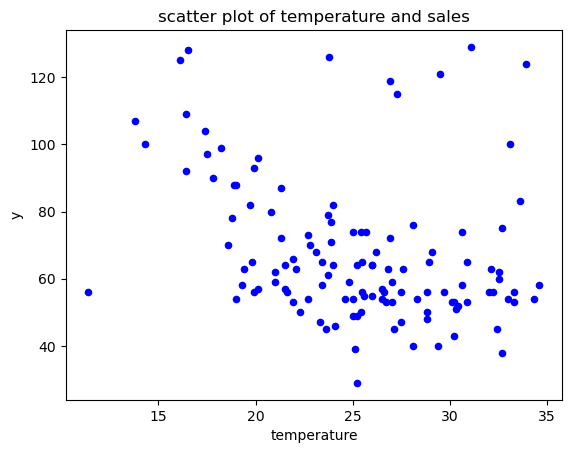

In [75]:
#気温と売り上げの散布図
train.plot.scatter( x='temperature', y='y', c="blue", title="scatter plot of temperature and sales" )
plt.show()

In [78]:
train[['y','temperature','kcal']].corr()

,y,temperature,kcal
y,1.000000,-0.316723,-0.119848
temperature,-0.316723,1.000000,0.298095
kcal,-0.119848,0.298095,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_

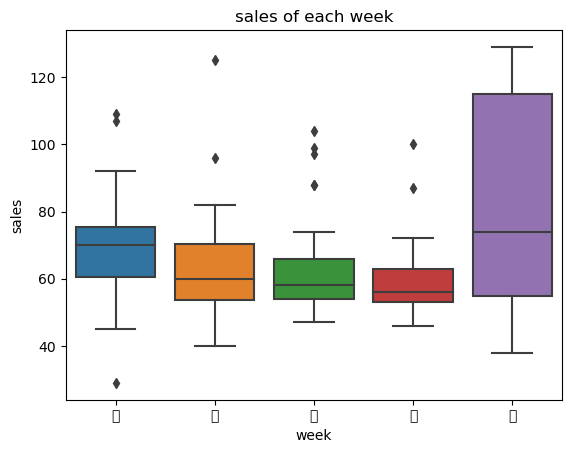

In [84]:
# 箱ひげ図の描画（表示順序をorderで指定している）
sns.boxplot( x='week', y='y', data=train,order=["月","火","水","木","金"] )

# y軸にラベルを付けます
plt.title("sales of each week")
plt.ylabel("sales")

# グラフの表示
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_

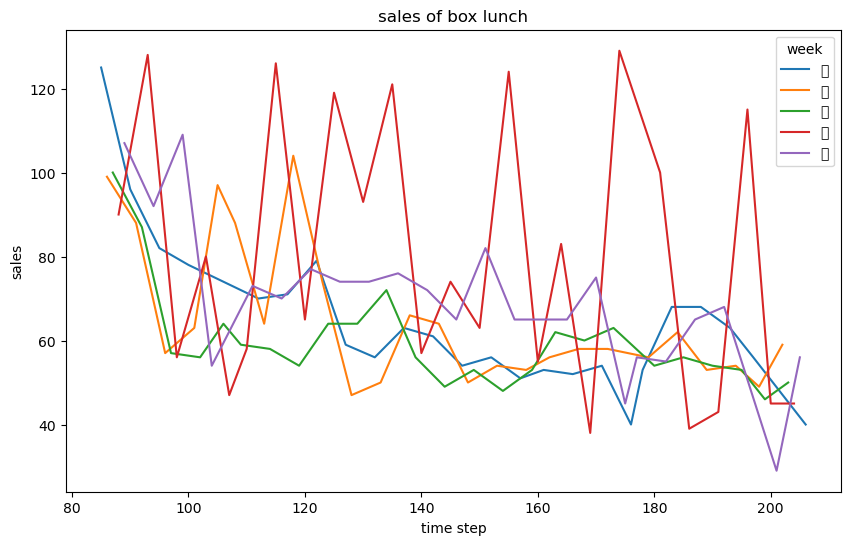

In [80]:
# グラフのサイズを指定して、折れ線グラフの描画
plt.figure(figsize=(10,6))
sns.lineplot( x=train.index, y='y', hue='week', data=train )

# x軸・y軸にラベルを付けます
plt.xlabel("time step")
plt.ylabel("sales")
# タイトルを付けます
plt.title("sales of box lunch")

# グラフの表示
plt.show()

In [88]:
# 欠損値の補正
kcal_mean = train['kcal'].mean()
print(kcal_mean)
train['kcal'].fillna(kcal_mean,inplace=True)
train['remarks'].fillna('特記事項なし',inplace=True)
train['event'].fillna('イベントなし',inplace=True)
train['payday'].fillna(0,inplace=True)

train.isnull().sum()

401.60909090909104


datetime         0
y                0
week             0
soldout          0
name             0
kcal             0
remarks          0
event            0
payday           0
weather          0
precipitation    0
temperature      0
dtype: int64

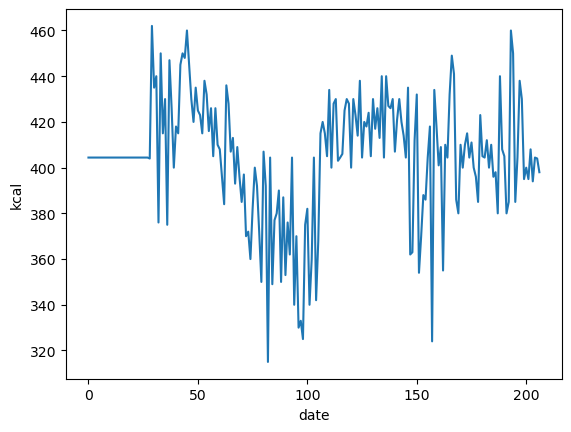

In [10]:
#カロリーの折れ線グラフを作る
train['kcal'].plot()
plt.xlabel('date')
plt.ylabel('kcal')
plt.show()

特記事項なし                      186
お楽しみメニュー                     12
料理長のこだわりメニュー                  5
鶏のレモンペッパー焼（50食）、カレー（42食）      1
酢豚（28食）、カレー（85食）              1
手作りの味                         1
スペシャルメニュー（800円）               1
Name: remarks, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20107 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12375 missing from c

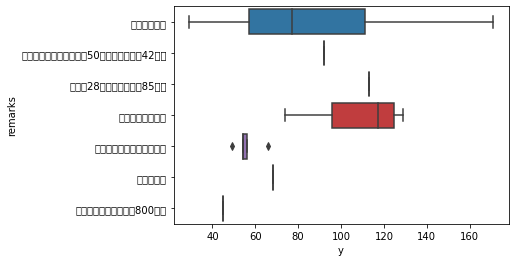

In [38]:
# remarksと販売数の相関
# 箱ひげ図
print(train['remarks'].value_counts())
sns.boxplot(x='y', y='remarks', data=train)
plt.show()

イベントなし           193
ママの会               9
キャリアアップ支援セミナー      5
Name: event, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12505 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12375 missing from c

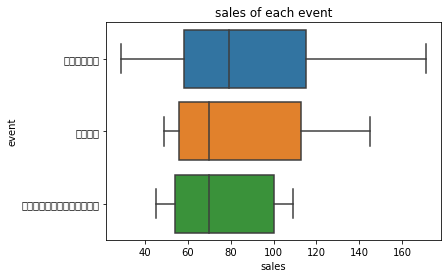

In [40]:
# eventと販売数の相関を調べる
print(train['event'].value_counts())
# 箱ひげ図
sns.boxplot(x='y', y='event', data=train)

# x軸にラベルを付けて表示
plt.title("sales of each event")
plt.xlabel("sales")
plt.show()

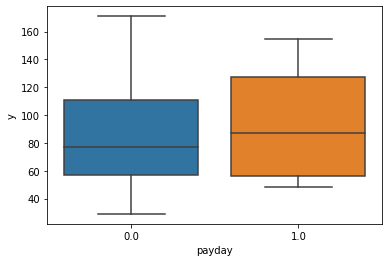

In [41]:
# 箱ひげ図
sns.boxplot(x='payday', y='y', data=train)
plt.show()

In [89]:
# 天気のデータを補正する
print(train['weather'].value_counts())
# 「快晴」「晴れ」→「晴れ」
train["weather"] = train['weather'].apply(lambda x: "晴れ" if x == "快晴" or x == "晴れ" else x)
# 「曇」「薄曇」→「曇」
train["weather"] = train['weather'].apply(lambda x: "曇" if x == "曇" or x == "薄曇" else x)
# 「雨」「雪」「雷電」→「雨」
train["weather"] = train['weather'].apply(lambda x: "雨" if x == "雨" or x == "雪" or x == "雷電"  else x)
# 確認
print(train['weather'].value_counts())

晴れ    37
曇     30
薄曇    22
雨     18
快晴    14
雷電     1
Name: weather, dtype: int64
曇     52
晴れ    51
雨     19
Name: weather, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26228 (\N{CJK UNIFIED IDEOGRAPH-6674}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12428 (\N{HIRAGANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26311 (\N{CJK UNIFIED IDEOGRAPH-66C7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38632 (\N{CJK UNIFIED IDEOGRAPH-96E8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


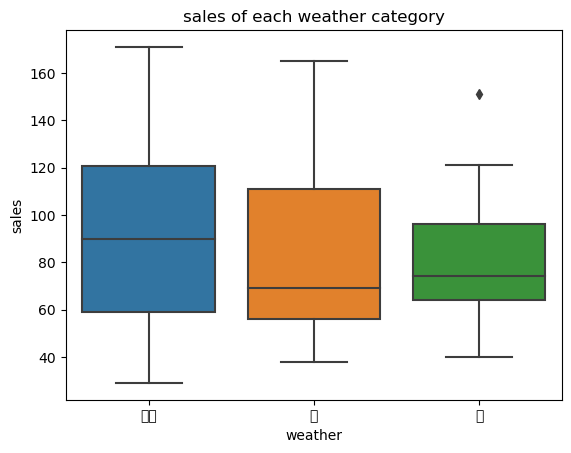

In [15]:
# 箱ひげ図（表示の順番をorderで指定しています）
sns.boxplot(x='weather', y='y', data=train, order=["晴","曇","雨"])

# y軸にラベルを付けて表示
plt.title("sales of each weather category")
plt.ylabel("sales")
plt.show()

In [90]:
# 特記事項を補正する
print(train['remarks'].value_counts())
# 「特記事項なし」以外→「特別メニュー」
train["remarks"] = train['remarks'].apply(lambda x: "特別メニュー" if x != "特記事項なし"  else x)
# 確認
print(train['remarks'].value_counts())

特記事項なし             104
お楽しみメニュー            11
料理長のこだわりメニュー         5
手作りの味                1
スペシャルメニュー（800円）      1
Name: remarks, dtype: int64
特記事項なし    104
特別メニュー     18
Name: remarks, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35352 (\N{CJK UNIFIED IDEOGRAPH-8A18}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20107 (\N{CJK UNIFIED IDEOGRAPH-4E8B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38917 (\N{CJK UNIFIED IDEOGRAPH-9805}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

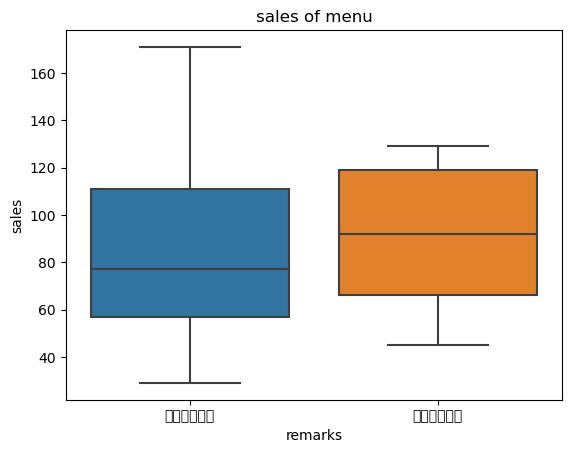

In [20]:
# 箱ひげ図（表示の順番をorderで指定しています）
sns.boxplot(x='remarks', y='y', data=train, order=["特記事項なし","特別メニュー"])

# y軸にラベルを付けて表示
plt.title("sales of menu")
plt.ylabel("sales")
plt.show()

In [91]:
# 降水量を補正する
print(train['precipitation'].value_counts())
# "--"→ 0
train["precipitation"] = train['precipitation'].apply(lambda x: "0" if x == "--"  else x)
# 0以外→ 1
train["precipitation"] = train['precipitation'].apply(lambda x: "1" if x != "0"  else x)
# 確認
print(train['precipitation'].value_counts())

--     93
0      21
0.5     4
1       1
6       1
6.5     1
2.5     1
Name: precipitation, dtype: int64
0    114
1      8
Name: precipitation, dtype: int64


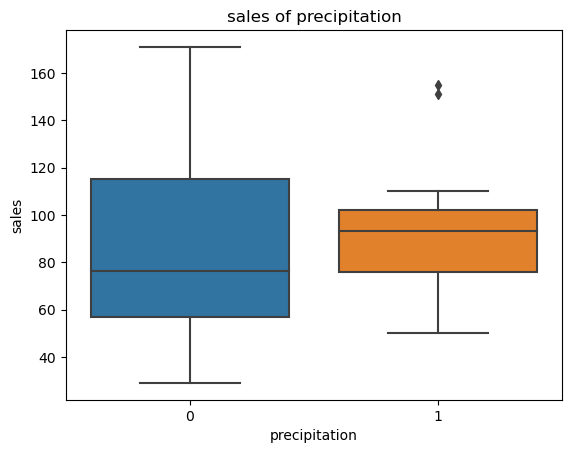

In [32]:
# 箱ひげ図（表示の順番をorderで指定しています）
sns.boxplot(x='precipitation', y='y', data=train, order=["0","1"])

# y軸にラベルを付けて表示
plt.title("sales of precipitation")
plt.ylabel("sales")
plt.show()

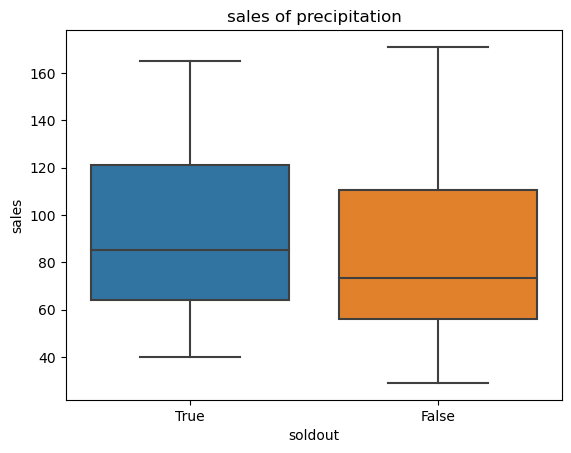

In [36]:
# 箱ひげ図（表示の順番をorderで指定しています）
sns.boxplot(x='soldout', y='y', data=train, order=[True,False])

# y軸にラベルを付けて表示
plt.title("sales of precipitation")
plt.ylabel("sales")
plt.show()

In [92]:
# 月データを追加
train["month"] = train['datetime'].apply(lambda x: x.split('-')[1] )

# 月を文字列→数値に変換
train['month'].astype(int)

85     4
86     4
87     4
88     4
89     4
      ..
202    9
203    9
204    9
205    9
206    9
Name: month, Length: 122, dtype: int32

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


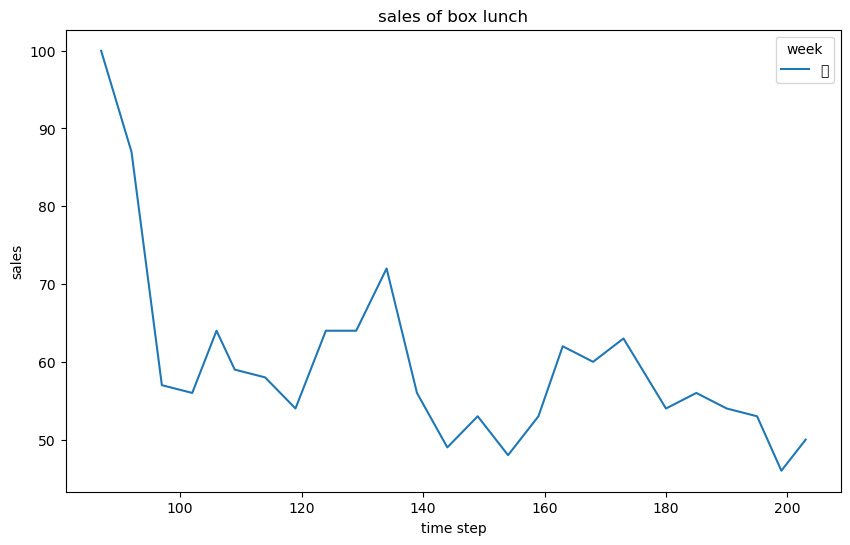

In [83]:
#金曜日のデータを抽出する
train_friday = train[train['week'] == "木"]

# グラフのサイズを指定して、折れ線グラフの描画
plt.figure(figsize=(10,6))
sns.lineplot( x=train_friday.index, y='y', hue='week', data=train_friday )

# x軸・y軸にラベルを付けます
plt.xlabel("time step")
plt.ylabel("sales")
# タイトルを付けます
plt.title("sales of box lunch")

# グラフの表示
plt.show()

In [47]:
# 欠損値のあるカラムに入っているデータを確認する
print(train_friday['remarks'].value_counts())
print(train_friday['weather'].value_counts())
print(train_friday['precipitation'].value_counts())
print(train_friday['name'].value_counts())

特記事項なし    26
特別メニュー    15
Name: remarks, dtype: int64
晴れ    26
曇     11
雨      4
Name: weather, dtype: int64
0    38
1     3
Name: precipitation, dtype: int64
手作りロースカツ            3
チキンカレー              3
ポークカレー              3
キーマカレー              2
ビッグメンチカツ            1
手作りトンカツ             1
牛肉コロッケ              1
炊き込みご飯              1
牛丼                  1
エビフライ               1
鶏の天ぷら               1
ひやしたぬきうどん・炊き込みご飯    1
豚肉の生姜焼き             1
ロコモコ丼               1
チキンの辛味噌焼き           1
メンチカツ               1
厚切イカフライ             1
手作りチキンカツ            1
鶏の味噌漬け焼き            1
中華丼                 1
タルタルinソーセージカツ       1
和風ソースハンバーグ          1
カレイ野菜あんかけ           1
ボローニャ風カツ            1
手作りひれかつ             1
酢豚orカレー             1
ロース甘味噌焼き            1
ホタテクリ―ムシチュー         1
メダイ照り焼              1
鶏のレモンペッパー焼orカレー     1
回鍋肉                 1
鶏の唐揚げ甘酢あん           1
タンドリーチキン            1
ランチビュッフェ            1
Name: name, dtype: int64


In [51]:
# 欠損値のあるカラムに入っているデータを確認する
print(train_var['remarks'].value_counts())
print(train_var['weather'].value_counts())
print(train_var['precipitation'].value_counts())
print(train_var['name'].value_counts())

特記事項なし    160
特別メニュー      6
Name: remarks, dtype: int64
晴れ    77
曇     67
雨     22
Name: weather, dtype: int64
0    154
1     12
Name: precipitation, dtype: int64
タンドリーチキン        5
メンチカツ           5
鶏の唐揚げおろしソース     4
マーボ豆腐           4
肉じゃが            4
               ..
海老クリーミ―クノーデル    1
チキンクリームシチュー     1
白身魚唐揚げ野菜あんかけ    1
ポークハヤシ          1
鶏肉とカシューナッツ炒め    1
Name: name, Length: 132, dtype: int64


In [49]:
train_friday_var =train_friday[train_friday['y'] >= 100] 
train_friday_var.shape

(15, 13)

In [50]:
print(train_friday_var['remarks'].value_counts())
print(train_friday_var['weather'].value_counts())
print(train_friday_var['precipitation'].value_counts())
print(train_friday_var['name'].value_counts())

特別メニュー    10
特記事項なし     5
Name: remarks, dtype: int64
晴れ    12
曇      3
Name: weather, dtype: int64
0    15
Name: precipitation, dtype: int64
チキンカレー           3
ポークカレー           3
キーマカレー           2
ビッグメンチカツ         1
タルタルinソーセージカツ    1
手作りロースカツ         1
タンドリーチキン         1
鶏の唐揚げ甘酢あん        1
酢豚orカレー          1
ロコモコ丼            1
Name: name, dtype: int64


In [93]:
train_var = train.drop(columns = ['datetime','name','event','temperature','kcal','soldout'])
print( train_var.head() )

      y week remarks  payday weather precipitation month
85  125    火  特記事項なし     0.0       曇             0     4
86   99    水  特記事項なし     0.0       曇             0     4
87  100    木  特記事項なし     0.0       雨             1     4
88   90    金  特記事項なし     0.0      晴れ             0     4
89  107    月  特記事項なし     0.0      晴れ             0     4


In [94]:
# カテゴリー変数のダミー変数化
train_dum = pd.get_dummies(train_var)
train_dum.head()

,y,payday,week_月,week_木,week_水,week_火,week_金,remarks_特別メニュー,remarks_特記事項なし,weather_晴れ,weather_曇,weather_雨,precipitation_0,precipitation_1,month_4,month_5,month_6,month_7,month_8,month_9
85,125,0.0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0
86,99,0.0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0
87,100,0.0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0
88,90,0.0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0
89,107,0.0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
